# Generate Figures and Summary tables for Reports

In [1]:
# Set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display
import os

In [2]:
!pwd

/Users/ktregier/Documents/Repositories/AudioLanguageClassifer/notebooks


In [3]:
DATA_PATH = '../data/'
DATA_PROCESS_PATH = DATA_PATH + 'processed/'
FIG_PATH = '../reports/figures/'

In [4]:
metapath = DATA_PROCESS_PATH + 'processed.csv'
meta = pd.read_csv(metapath, index_col='speakerid')
meta.shape

(2134, 8)

In [5]:
meta.head()

,age,age_onset,birthplace,filename,native_language,sex,country,file_missing?
speakerid,,,,,,,,
1,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,south africa,False
2,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,south africa,False
3,25.0,15.0,"diekabo, ivory coast",agni1,agni,male,ivory coast,False
4,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,kosovo,False
5,33.0,15.0,"tirana, albania",albanian2,albanian,male,albania,False


In [6]:
meta['Native Language'] = meta['native_language'].str.capitalize()
meta['Gender'] = meta['sex'].str.capitalize()
meta['Country'] = meta['country'].str.title()

## Load summary  files for Gender and Language speakers and segments

In [7]:
gen = pd.read_csv('../models/gender/gen_data_split_summary.csv' )#, index_col=['dataset', 'gender'])
gen['dataset'] = gen['dataset'].str.capitalize()
gen.rename({'gender':'Gender', 'dataset':'Data split'}, inplace=True, axis=1)
gen.head()

,Data split,Gender,n_speakers,%_speakers,n_segs,%_segs
0,Train,F,581,0.484167,2746,0.493707
1,Train,M,619,0.515833,2816,0.506293
2,Val,F,194,0.485000,898,0.484881
3,Val,M,206,0.515000,954,0.515119
4,Test,F,259,0.485019,596,0.494196


In [8]:
lang = pd.read_csv('../data/lang10/data_split_summary.csv', index_col=['Unnamed: 0'])

In [9]:
lang.rename({'index':'Language', 'dataset':'Data split'}, inplace=True, axis=1)
lang.Language = lang.Language.str.capitalize()
lang['Data split'] = lang['Data split'].str.capitalize()
lang['L'] = [x[0] for x in lang.Language]
lang.sort_values(by = ['L'], inplace=True)

In [10]:
lang['%_sp_total'] = lang['n_sp']/lang['n_sp'].sum()*100
lang['%_seg_total'] = lang['n_seg']/lang['n_seg'].sum() *100
lang['%_sp_data'] = lang['n_sp']/lang.groupby('Data split')['n_sp'].transform('sum') *100
lang['%_seg_data'] = lang['n_seg']/lang.groupby('Data split')['n_seg'].transform('sum') *100
lang.head()

,Language,Data split,n_seg,n_sp,L,%_sp_total,%_seg_total,%_sp_data,%_seg_data
0,Arabic,Train,234,42,A,6.763285,9.304175,12.138728,14.570361
22,Arabic,Test,58,19,A,3.059581,2.306163,12.025316,15.549598
11,Arabic,Val,88,14,A,2.254428,3.499006,11.965812,16.417910
30,Dutch,Test,26,12,D,1.932367,1.033797,7.594937,6.970509
19,Dutch,Val,36,9,D,1.449275,1.431412,7.692308,6.716418


In [11]:
by_data = lang.groupby('Data split').sum()
by_data.reset_index(inplace=True)
by_data.head()

,Data split,n_seg,n_sp,%_sp_total,%_seg_total,%_sp_data,%_seg_data
0,Test,373,158,25.442834,14.831014,100.0,100.0
1,Train,1606,346,55.716586,63.856859,100.0,100.0
2,Val,536,117,18.840580,21.312127,100.0,100.0


# General summary figures

In [12]:
lang_list = ['spanish', 'arabic', 'mandarin', 'french', 'korean', 'russian', 
             'portuguese', 'dutch', 'turkish', 'german' ]
top_lang = meta.loc[meta.native_language.isin(lang_list)]
top_lang['Native Language'] = top_lang['native_language'].str.capitalize()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


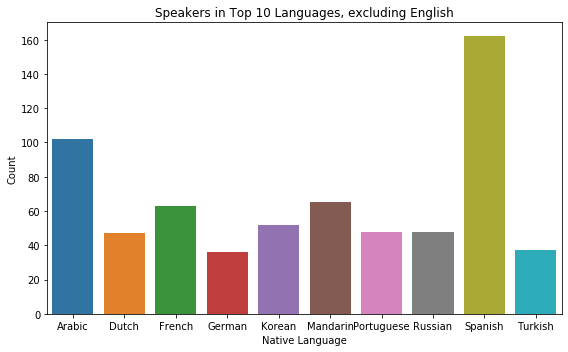

In [13]:
fig = plt.subplots(1, 1, figsize=(8, 5))
sns.countplot(x='Native Language', data=top_lang)
plt.title('Speakers in Top 10 Languages, excluding English')
plt.ylabel('Count')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('{}TopLangCount.png'.format(FIG_PATH))

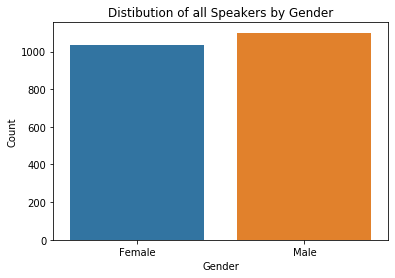

In [14]:
sns.countplot(x='Gender', data=meta)
plt.title('Distibution of all Speakers by Gender')
plt.ylabel('Count')
#plt.xlabel('Gender')
plt.savefig('{}GenderDistAll.png'.format(FIG_PATH))

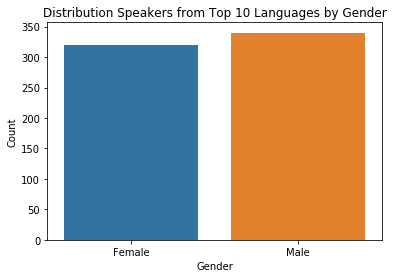

In [15]:
sns.countplot(x='Gender', data=top_lang)
plt.title('Distribution Speakers from Top 10 Languages by Gender')
plt.ylabel('Count')
plt.savefig('{}GenderDistTop.png'.format(FIG_PATH))

In [16]:
english = meta.loc[meta.native_language == 'english']

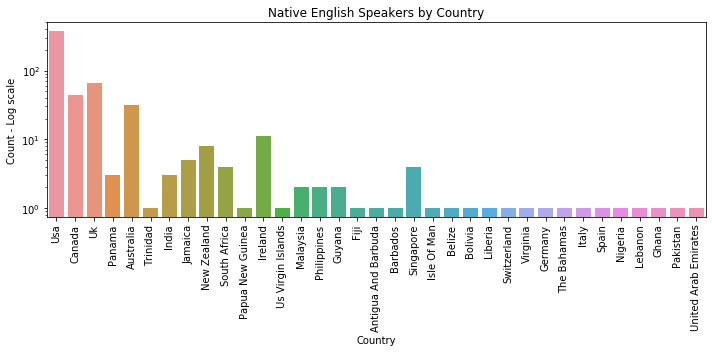

In [17]:
fig = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(x='Country', data=english)
plt.yscale('log')
plt.ylabel('Count - Log scale')
plt.xticks(rotation=90)
plt.title('Native English Speakers by Country')
plt.tight_layout()
plt.savefig('{}EnglishCountry.png'.format(FIG_PATH))

## Plots based on what I wanted in my reports

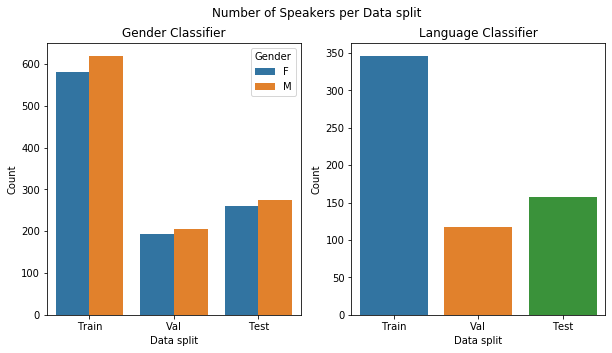

In [18]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x='Data split', y='n_speakers', data=gen, hue='Gender', ax=axn[0])
axn[0].set_title('Gender Classifier')
axn[0].set_ylabel('Count')

sns.barplot(x='Data split', y='n_sp', data=by_data, ax=axn[1], order=['Train', 'Val', 'Test'])
axn[1].set_title('Language Classifier')
axn[1].set_ylabel('Count')

plt.suptitle('Number of Speakers per Data split')
plt.savefig('{}Both_NSpeakSplit.png'.format(FIG_PATH))

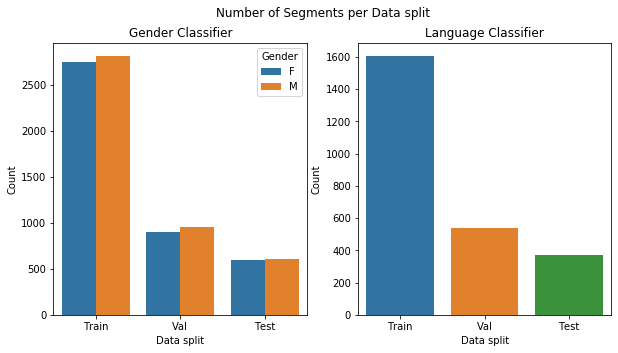

In [19]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x='Data split', y='n_segs', data=gen, hue='Gender', ax=axn[0])
axn[0].set_title('Gender Classifier')
axn[0].set_ylabel('Count')

sns.barplot(x='Data split', y='n_seg', data=by_data, ax=axn[1], order=['Train', 'Val', 'Test'])
axn[1].set_title('Language Classifier')
axn[1].set_ylabel('Count')

plt.suptitle('Number of Segments per Data split')
plt.savefig('{}Both_NSegSplit.png'.format(FIG_PATH))

# Gender Classifier Summaries

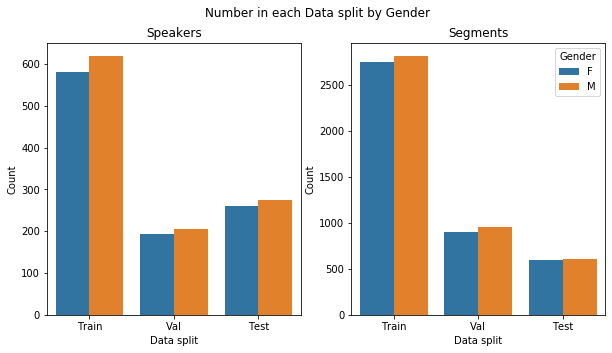

In [20]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x='Data split', y='n_speakers', data=gen, hue='Gender', ax=axn[0])
axn[0].set_title('Speakers')
axn[0].set_ylabel('Count')
axn[0].get_legend().remove()

sns.barplot(x='Data split', y='n_segs', data=gen, hue='Gender', ax=axn[1])
axn[1].set_title('Segments')
axn[1].set_ylabel('Count')

plt.suptitle('Number in each Data split by Gender')
plt.savefig('{}Gen_NSegSpeakSplit.png'.format(FIG_PATH))

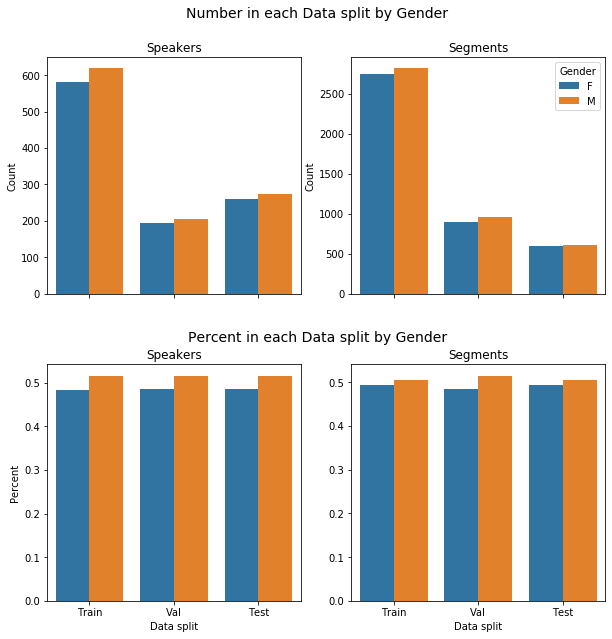

In [21]:
fig, axn = plt.subplots(2, 2, figsize=(10, 10), sharex=True)

sns.barplot(x='Data split', y='n_speakers', data=gen, hue='Gender', ax=axn[0,0])
axn[0,0].set_title('Speakers')
axn[0,0].set_ylabel('Count')
axn[0,0].get_legend().remove()
axn[0,0].set_xlabel('')

sns.barplot(x='Data split', y='n_segs', data=gen, hue='Gender', ax=axn[0,1])
axn[0,1].set_title('Segments')
axn[0,1].set_ylabel('Count')
axn[0,1].set_xlabel('')

sns.barplot(x='Data split', y='%_speakers', data=gen, hue='Gender', ax=axn[1,0])
axn[1,0].set_title('Speakers')
axn[1,0].set_ylabel('Percent')
axn[1,0].get_legend().remove()

sns.barplot(x='Data split', y='%_segs', data=gen, hue='Gender', ax=axn[1,1])
axn[1,1].set_title('Segments')
axn[1,1].set_ylabel('')
axn[1,1].get_legend().remove()

plt.figtext(0.5,0.95, "Number in each Data split by Gender", ha="center", va="top", fontsize=14, color="k")
plt.figtext(0.5,0.5, "Percent in each Data split by Gender", ha="center", va="top", fontsize=14, color="k")
plt.subplots_adjust(hspace = 0.3 )

#plt.savefig('{}Gen_SegSpeakSplit.png'.format(FIG_PATH))


Text(0.5, 0.98, 'Number of each Gender by Data split')

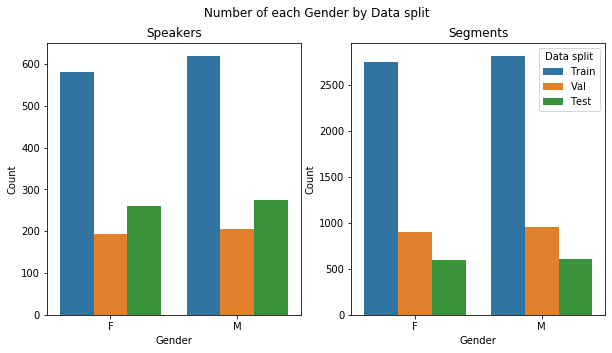

In [22]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x='Gender', y='n_speakers', data=gen, hue='Data split', ax=axn[0])
axn[0].set_title('Speakers')
axn[0].set_ylabel('Count')
axn[0].get_legend().remove()

sns.barplot(x='Gender', y='n_segs', data=gen, hue='Data split', ax=axn[1])
axn[1].set_title('Segments')
axn[1].set_ylabel('Count')

plt.suptitle('Number of each Gender by Data split')
#plt.tight_layout()
#plt.savefig('{}Gen_NSegSpeakGender.png'.format(FIG_PATH))

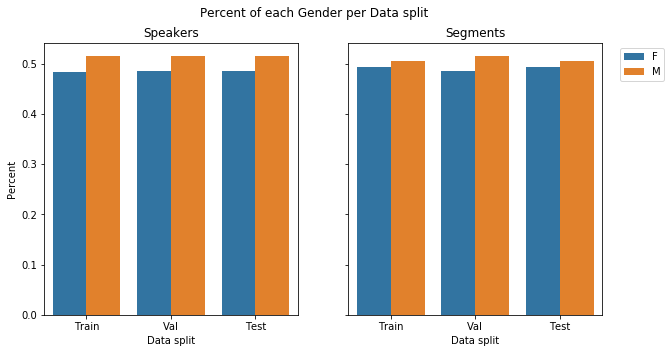

In [23]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(x='Data split', y='%_speakers', data=gen, hue='Gender', ax=axn[0])
axn[0].set_title('Speakers')
axn[0].set_ylabel('Percent')
axn[0].set_xlabel('Data split')
axn[0].get_legend().remove()

sns.barplot(x='Data split', y='%_segs', data=gen, hue='Gender', ax=axn[1])
axn[1].set_title('Segments')
axn[1].set_ylabel('')
axn[1].set_xlabel('Data split')

plt.suptitle('Percent of each Gender per Data split')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.tight_layout()
#plt.savefig('{}Gen_PercentSegSpeakSplit.png'.format(FIG_PATH))

Text(0.5, 0.98, 'Percentage of each Gender by Data split')

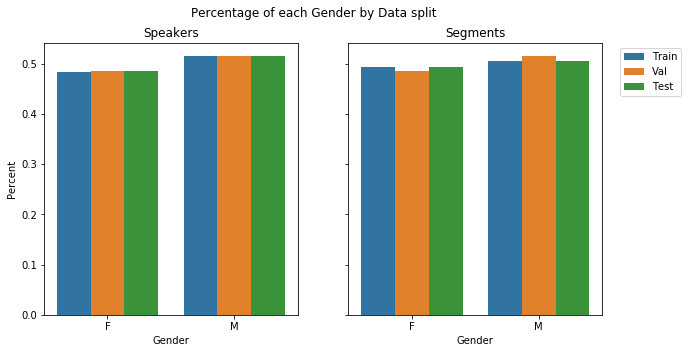

In [24]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(x='Gender', y='%_speakers', data=gen, hue='Data split', ax=axn[0])
axn[0].set_title('Speakers')
axn[0].set_ylabel('Percent')
axn[0].get_legend().remove()

sns.barplot(x='Gender', y='%_segs', data=gen, hue='Data split', ax=axn[1])
axn[1].set_title('Segments')
axn[1].set_ylabel('')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('Percentage of each Gender by Data split')
#plt.tight_layout()
#plt.savefig('{}Gen_PercentSegSpeakGender.png'.format(FIG_PATH))

# Language classifier summaries

Text(0.5, 0.98, 'Number per data split')

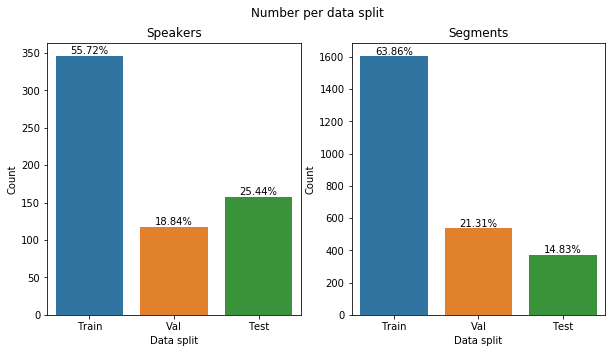

In [25]:
fig, axn = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x='Data split', y='n_sp', data=by_data, ax=axn[0], order=['Train', 'Val', 'Test'])

for p in axn[0].patches:
    height = p.get_height()
    axn[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/lang['n_sp'].sum() * 100),
            ha="center")     
    
axn[0].set_title('Speakers')
axn[0].set_ylabel('Count')

sns.barplot(x='Data split', y='n_seg', data=by_data, ax=axn[1], order=['Train', 'Val', 'Test'])
axn[1].set_title('Segments')
axn[1].set_ylabel('Count')

for p in axn[1].patches:
    height = p.get_height()
    axn[1].text(p.get_x()+p.get_width()/2.,
            height+10,
            '{:1.2f}%'.format(height/lang['n_seg'].sum() * 100),
            ha="center") 

plt.suptitle('Number per data split')
#plt.savefig('{}Lang_NSegSpeakSplit.png'.format(FIG_PATH))

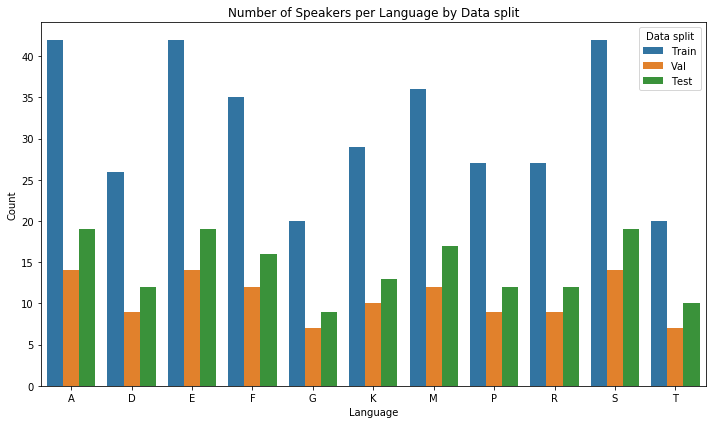

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x='L', y='n_sp', data=lang, hue='Data split', hue_order=['Train', 'Val', 'Test'])
plt.title('Number of Speakers per Language by Data split')
plt.ylabel('Count')
plt.xlabel('Language')

plt.tight_layout()
plt.savefig('{}Lang_NSpeakLangbySplit.png'.format(FIG_PATH))

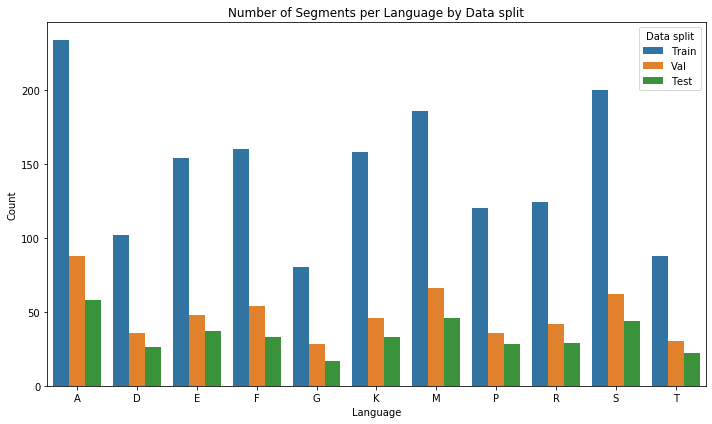

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x='L', y='n_seg', data=lang, hue='Data split', hue_order=['Train', 'Val', 'Test'])
plt.title('Number of Segments per Language by Data split')
plt.ylabel('Count')
plt.xlabel('Language')
plt.tight_layout()
#plt.savefig('{}Lang.NSegmentLangbySplit.png'.format(FIG_PATH))

In [28]:
by_lang = lang.groupby('Language').sum()
by_lang.reset_index(inplace=True)
by_lang['L'] = [x[0] for x in by_lang.Language]
by_lang.rename({'%_sp_total': 'Speakers', '%_seg_total': 'Segments'}, inplace=True, axis=1)

by_lang.set_index('L', inplace=True)
by_lang.sort_values('Segments', inplace=True, ascending=False)
by_lang

,Language,n_seg,n_sp,Speakers,Segments,%_sp_data,%_seg_data
L,,,,,,,
A,Arabic,380,75,12.077295,15.109344,36.129857,46.537869
S,Spanish,306,75,12.077295,12.166998,36.129857,35.816711
M,Mandarin,298,65,10.466989,11.848907,31.420528,36.227442
F,French,247,63,10.144928,9.821074,30.498599,28.884452
E,English,239,75,12.077295,9.502982,36.129857,28.463836
K,Korean,237,52,8.373591,9.423459,25.156360,27.267382
R,Russian,195,48,7.729469,7.753479,23.090713,23.331666
P,Portuguese,184,48,7.729469,7.316103,23.090713,21.695100
D,Dutch,164,47,7.568438,6.520875,22.801695,20.038110


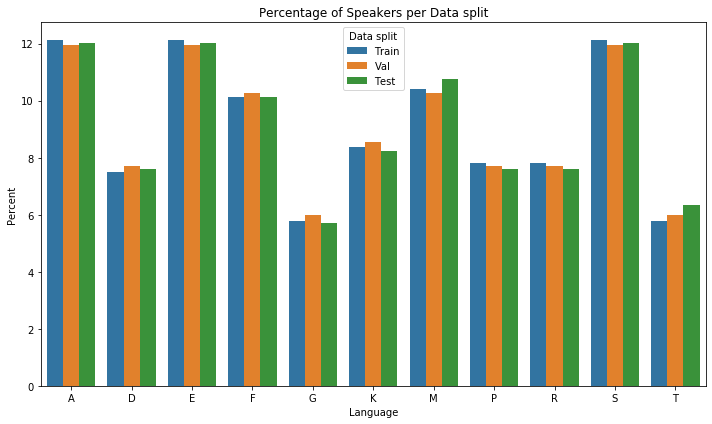

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x='L', y='%_sp_data', data=lang, hue='Data split', hue_order = ['Train', 'Val', 'Test'])
plt.title('Percentage of Speakers per Data split')
plt.xlabel('Language')
plt.ylabel('Percent')
plt.tight_layout()
#plt.savefig('{}Lang_PercentSpeakLangbySplit.png'.format(FIG_PATH))

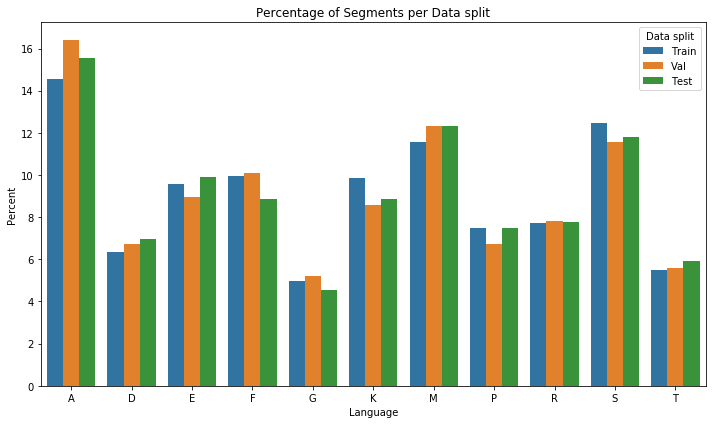

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x='L', y='%_seg_data', data=lang, hue='Data split', hue_order = ['Train', 'Val', 'Test'])
plt.title('Percentage of Segments per Data split')
plt.xlabel('Language')
plt.ylabel('Percent')
plt.tight_layout()
#plt.savefig('{}Lang_PercentSegLangbySplit.png'.format(FIG_PATH))

In [31]:
by_lang.describe()

,n_seg,n_sp,Speakers,Segments,%_sp_data,%_seg_data
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,228.636364,56.454545,9.090909,9.090909,27.272727,27.272727
std,77.537440,14.821361,2.386693,3.083000,7.092134,9.433341
min,125.000000,36.000000,5.797101,4.970179,17.459455,14.762841
25%,174.000000,47.500000,7.648953,6.918489,22.946204,20.866605
50%,237.000000,52.000000,8.373591,9.423459,25.156360,27.267382
75%,272.500000,70.000000,11.272142,10.834990,33.775192,32.350581
max,380.000000,75.000000,12.077295,15.109344,36.129857,46.537869


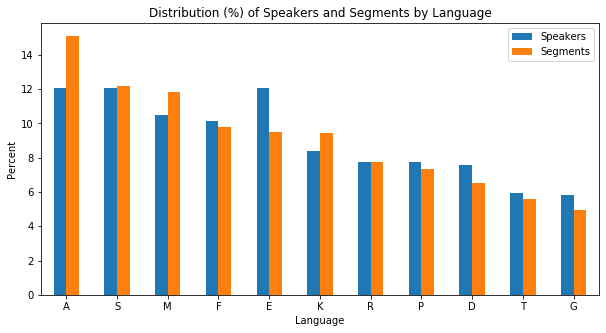

In [32]:
by_lang[['Speakers', 'Segments']].plot.bar(figsize=(10, 5))
plt.xlabel('Language')
plt.title('Distribution (%) of Speakers and Segments by Language')
plt.ylabel('Percent')
plt.xticks(rotation="horizontal")
plt.savefig('{}LangDistPercentSpSeg.png'.format(FIG_PATH))

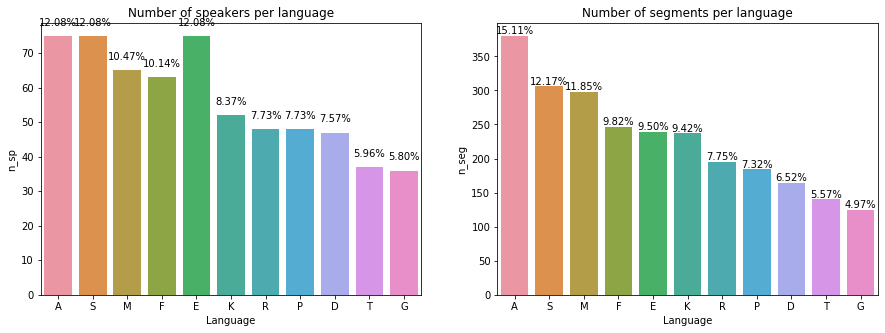

In [33]:
fig, axn = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='Language', y='n_sp', data=by_lang, ax=axn[0] ) #, order=['train', 'val', 'test'])
axn[0].set_title('Number of speakers per language')
axn[0].set_xticklabels(by_lang.Language.str[0])


for p in axn[0].patches:
    height = p.get_height()
    axn[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/lang['n_sp'].sum() * 100),
            ha="center")  

sns.barplot(x='Language', y='n_seg', data=by_lang, ax=axn[1] ) #, order=['train', 'val', 'test'])
axn[1].set_title('Number of segments per language')
axn[1].set_xticklabels(by_lang.Language.str[0])

for p in axn[1].patches:
    height = p.get_height()
    axn[1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/lang['n_seg'].sum() * 100),
            ha="center")  

#plt.savefig('{}Lang.NSegSpeakLang.png'.format(FIG_PATH))

Text(0.5, 0.98, 'Percentage of speakers by language per data split')

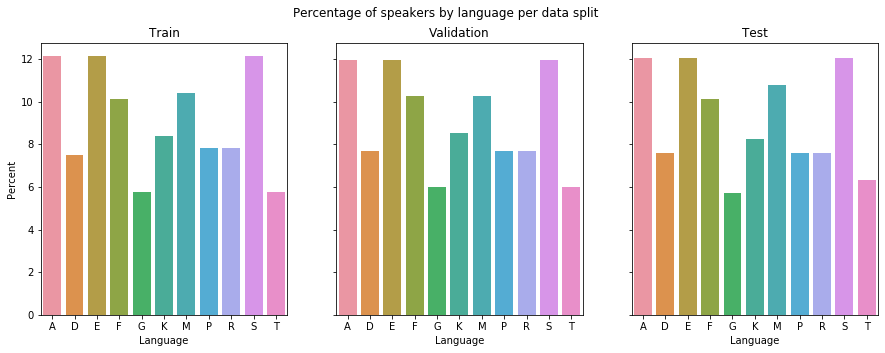

In [34]:
# Plot number of speakers per language per data split  
fig, axn = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(data = lang.loc[lang['Data split']=='Train'], x='L', y='%_sp_data', ax=axn[0])
axn[0].set_title('Train')
axn[0].set_xlabel('Language')
axn[0].set_ylabel('Percent')

sns.barplot(data = lang.loc[lang['Data split']=='Val'], x='L', y='%_sp_data', ax=axn[1])
axn[1].set_title('Validation')
axn[1].set_xlabel('Language')
axn[1].set_ylabel('')

sns.barplot(data = lang.loc[lang['Data split']=='Test'], x='L', y='%_sp_data', ax=axn[2])
axn[2].set_title('Test')
axn[2].set_xlabel('Language')
axn[2].set_ylabel('')

plt.suptitle('Percentage of speakers by language per data split')
#plt.tight_layout()
#plt.savefig('{}Lang_PercentSpeakLangbySplit3panel.png'.format(FIG_PATH))

Text(0.5, 0.98, 'Percentage of segments by language per data split')

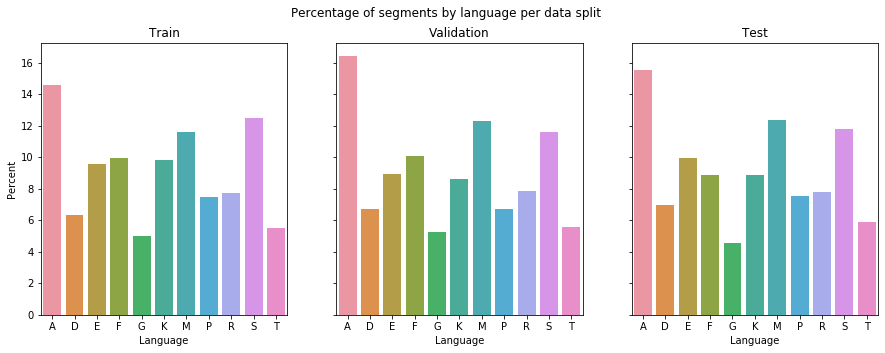

In [35]:
# Plot number of segments per language per data split  
fig, axn = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(data = lang.loc[lang['Data split']=='Train'], x='L', y='%_seg_data', ax=axn[0])
axn[0].set_title('Train')
axn[0].set_xlabel('Language')
axn[0].set_ylabel('Percent')

sns.barplot(data = lang.loc[lang['Data split']=='Val'], x='L', y='%_seg_data', ax=axn[1])
axn[1].set_title('Validation')
axn[1].set_xlabel('Language')
axn[1].set_ylabel('')

sns.barplot(data = lang.loc[lang['Data split']=='Test'], x='L', y='%_seg_data', ax=axn[2])
axn[2].set_title('Test')
axn[2].set_xlabel('Language')
axn[2].set_ylabel('')

plt.suptitle('Percentage of segments by language per data split')
#plt.tight_layout()
#plt.savefig('{}Lang_PercentSegLangbySplit3panel.png'.format(FIG_PATH))

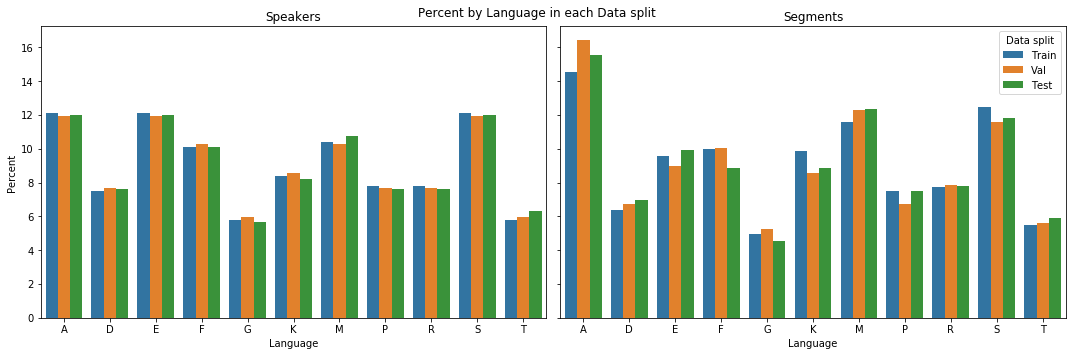

In [36]:
fig, axn = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(data = lang, x='L', y='%_sp_data', hue='Data split', ax=axn[0], hue_order=['Train', 'Val', 'Test'])
axn[0].set_title('Speakers')
axn[0].set_ylabel('Percent')
axn[0].set_xlabel('Language')
axn[0].get_legend().remove()

sns.barplot(data = lang, x='L', y='%_seg_data', hue='Data split', ax=axn[1], hue_order=['Train', 'Val', 'Test'])
axn[1].set_title('Segments')
axn[1].set_ylabel('')
axn[1].set_xlabel('Language')

plt.suptitle("Percent by Language in each Data split")
plt.tight_layout()
plt.savefig('{}Lang_PctSpSegLangbySplit.png'.format(FIG_PATH))

## Confusion matrix calculations for Model metrics report

In [21]:
def colsum(arr, n, m):
    su_list = []
    for i in range(n): 
        su = 0; 
        for j in range(m): 
            su += arr[j][i]    
        #print(su, end = " ")
        su_list.append(su)
    return su_list

In [22]:
# Model 3 confustion matrix
conf_mat = [
    [ 0,  2,  1,  4,  0,  1,  7,  4,  1,  1,  7],
    [ 0, 24,  0,  4,  1,  7,  2,  2,  4,  0, 11],
    [ 0,  1,  1,  4,  0,  3,  4,  0,  2,  1,  5],
    [ 1, 10,  0,  6,  0,  3,  2,  2,  4,  2,  1],
    [ 0,  0,  0,  1,  0,  0,  5,  1,  5,  2,  1],
    [ 0,  4,  0,  0,  0, 12,  3,  1,  3,  1,  1],
    [ 1,  2,  0,  6,  2,  1, 12,  3,  8,  0,  7],
    [ 1,  3,  0,  4,  1,  2, 10,  5,  1,  1,  4],
    [ 0,  1,  0,  3,  0,  5,  2,  2, 13,  0,  4],
    [ 0,  3,  0,  3,  1,  0,  7,  5,  3,  0,  6],
    [ 0,  2,  0,  8,  2,  4,  9,  1,  2,  2, 15]]

In [23]:
row_sum = [sum(i) for i in conf_mat]
print(row_sum)
print(sum(row_sum))

[28, 55, 21, 31, 15, 25, 42, 32, 30, 28, 45]
352


In [24]:
col_sum = colsum(conf_mat, len(conf_mat[0]), len(conf_mat)) 

print(col_sum)
print(sum(col_sum))

[3, 52, 2, 43, 7, 38, 63, 26, 46, 10, 62]
352


In [25]:
print("Mean: {}, Median: {}, SD: {}".format(np.mean(col_sum), np.median(col_sum), np.std(col_sum)))

Mean: 32.0, Median: 38.0, SD: 22.360679774997898


In [26]:
print("Min: {}, Mxn: {}".format(np.min(col_sum), np.max(col_sum)))


Min: 2, Mxn: 63


In [27]:
#Model 2 Conf Mat
conf_mat2 = [
    [ 1, 2, 2, 0, 3, 0, 4, 4, 1, 3, 8],
    [ 0,26, 0, 0, 2, 6, 4, 0, 3, 1,13],
    [ 1, 2, 2, 2, 1, 4, 4, 1, 1, 1, 2],
    [ 5, 4, 2, 4, 0, 3, 4, 1, 1, 3, 4],
    [ 1, 0, 0, 0, 0, 1, 3, 2, 4, 3, 1],
    [ 1, 1, 1, 0, 1,12, 1, 1, 3, 2, 2],
    [ 3, 1, 3, 0, 4, 2, 6, 2,10, 2, 9],
    [ 2, 4, 1, 2, 1, 1, 9, 3, 3, 2, 4],
    [ 1, 1, 0, 1, 0, 3, 2, 0,15, 0, 7],
    [ 7, 3, 1, 3, 1, 1, 1, 2, 4, 1, 4],
    [ 1, 0, 3, 5, 1, 5, 9, 3, 3, 1,14]]

In [28]:
row_sum2 = [sum(i) for i in conf_mat2]
print(row_sum2)
print(sum(row_sum2))

[28, 55, 21, 31, 15, 25, 42, 32, 30, 28, 45]
352


In [29]:
col_sum2 = colsum(conf_mat2, len(conf_mat2[0]), len(conf_mat2))
print(col_sum2)

[23, 44, 15, 17, 14, 38, 47, 19, 48, 19, 68]


In [30]:
print("Mean: {}, Median: {}, SD: {}".format(np.mean(col_sum2), np.median(col_sum2), np.std(col_sum2)))

Mean: 32.0, Median: 23.0, SD: 17.093326714885496


In [31]:
print("Min: {}, Mxn: {}".format(np.min(col_sum2), np.max(col_sum2)))

Min: 14, Mxn: 68


# Audio files

In [41]:
#Waveform of english and Arabic soundfiles, 
#Add red lines at segments
SR = 16000

In [42]:
eng_path = '../data/original/recordings/recordings/english11.mp3'
eng, sr = librosa.load(eng_path, SR)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [43]:
arb_path = '../data/original/recordings/recordings/arabic24.mp3'
arb , sr= librosa.load(arb_path, SR)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


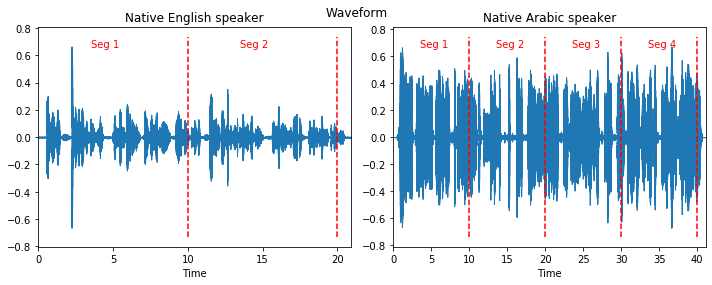

In [44]:
fig, axn = plt.subplots(1, 2, figsize=(10,4))

librosa.display.waveplot(eng, sr=SR, ax=axn[0])
axn[0].set_title('Native English speaker')
y_min, y_max = axn[0].get_ylim()
axn[0].vlines(10, y_min, y_max, linestyles='dashed',colors='r')
axn[0].vlines(20, y_min, y_max, linestyles='dashed',colors='r')
axn[0].text(3.5, y_max*.9, 'Seg 1', c='r')
axn[0].text(13.5, y_max*.9, 'Seg 2', c='r')

librosa.display.waveplot(arb, sr=SR, ax=axn[1])
axn[1].set_title('Native Arabic speaker')

y_min, y_max = axn[1].get_ylim()
axn[1].vlines(10, y_min, y_max, linestyles='dashed',colors='r')
axn[1].vlines(20, y_min, y_max, linestyles='dashed',colors='r')
axn[1].vlines(30, y_min, y_max, linestyles='dashed',colors='r')
axn[1].vlines(40, y_min, y_max, linestyles='dashed',colors='r')
axn[1].text(3.5, y_max*.9, 'Seg 1', c='r')
axn[1].text(13.5, y_max*.9, 'Seg 2', c='r')
axn[1].text(23.5, y_max*.9, 'Seg 3', c='r')
axn[1].text(33.5, y_max*.9, 'Seg 4', c='r')

plt.suptitle('Waveform')
plt.tight_layout()
plt.savefig('{}Waveforms.png'.format(FIG_PATH))

In [45]:
# Segment audio file to convert to .wav, for mel spect.
def segment_10s(audio, sr):
    seg_files ={}
    n_seg = int((len(audio)/sr)/10)
    for i in range(n_seg):
        segment = audio[10*i*sr:(i+1)*10*sr]
        seg_files[i] = segment
    return seg_files

In [46]:
eng_seg = segment_10s(eng, SR)
eng_seg.keys()

dict_keys([0, 1])

In [47]:
# Add noise to English file
def add_noise(audio):
    rng = np.random.default_rng()
    noise = rng.standard_normal(len(audio))
    noisy_seg = audio + 0.005*noise
    return noisy_seg

eng_noise = add_noise(eng_seg[0])

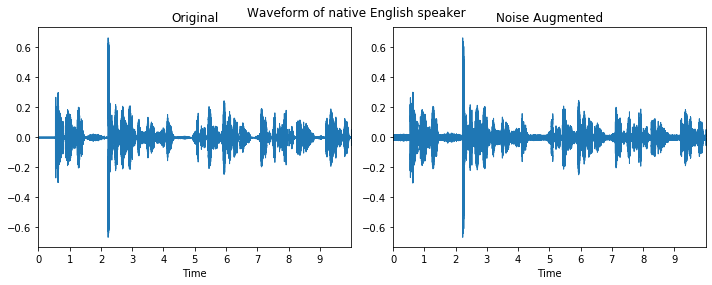

In [48]:
fig, axn = plt.subplots(1, 2, figsize=(10,4))

librosa.display.waveplot(eng_seg[0], sr=SR, ax=axn[0])
axn[0].set_title('Original')


librosa.display.waveplot(eng_noise, sr=SR, ax=axn[1])
axn[1].set_title('Noise Augmented')

plt.suptitle('Waveform of native English speaker')
plt.tight_layout()
plt.savefig('{}OrigNoise.png'.format(FIG_PATH))

## Plot spectrogram examples

In [49]:
# Mel spectrogram parameters
N_MEL_BANDS = 64
FREQ_MIN = 125
FREQ_MAX = 7500
HOP = 1667
WIN = 400
FFT = 512

In [50]:
mel_spec = librosa.feature.melspectrogram(eng_seg[0], SR, n_mels=N_MEL_BANDS, 
                                     fmin=FREQ_MIN, fmax=FREQ_MAX,
                                     hop_length=HOP, n_fft=FFT)

mel_db = librosa.power_to_db(mel_spec, ref=np.max)

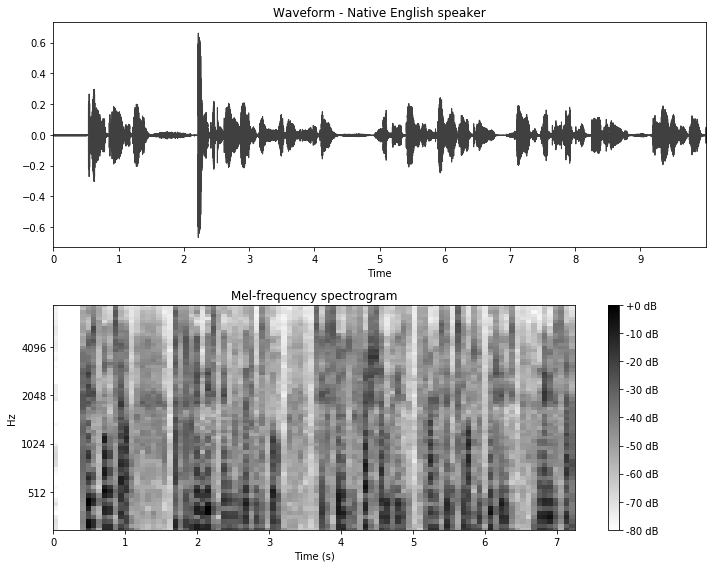

In [51]:
fig, axn = plt.subplots(2, 1, figsize=(10, 8))
librosa.display.waveplot(eng_seg[0], sr=SR, ax=axn[0], color='0.25')
axn[0].set(title='Waveform - Native English speaker')
 
#mel_db = librosa.power_to_db(mel_spec, ref=np.max)
img = librosa.display.specshow(mel_db, x_axis='s', y_axis='mel', 
                               ax=axn[1], fmin=FREQ_MIN, fmax=FREQ_MAX,
                               cmap='gray_r', hop_length=HOP)
fig.colorbar(img, ax=axn[1], format='%+2.0f dB')
axn[1].set(title="Mel-frequency spectrogram")
plt.tight_layout()
#plt.savefig('{}EnglishMelSpecVert.png'.format(FIG_PATH))

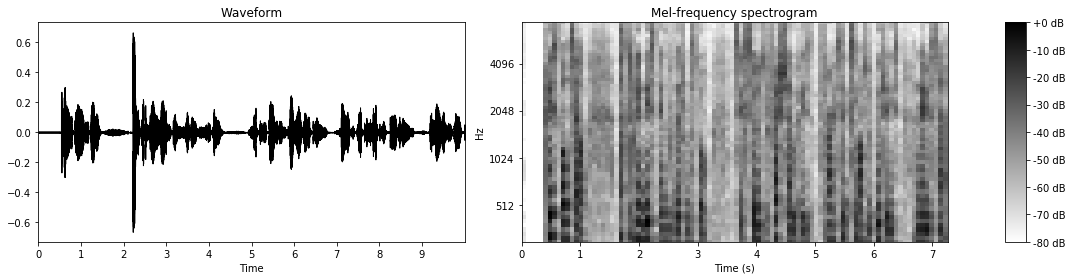

In [52]:
fig, axn = plt.subplots(1, 3, figsize=(15,4), gridspec_kw={
                           'width_ratios': [1, 1, 0.05]})
librosa.display.waveplot(eng_seg[0], sr=SR, ax=axn[0], color='k')#0.25')
axn[0].set(title='Waveform')
 
#mel_db = librosa.power_to_db(mel_spec, ref=np.max)
img = librosa.display.specshow(mel_db, x_axis='s', y_axis='mel', 
                               ax=axn[1], fmin=FREQ_MIN, fmax=FREQ_MAX,
                               cmap='gray_r', hop_length=HOP)
axn[1].set(title="Mel-frequency spectrogram")
    
fig.colorbar(img, cax=axn[2], format='%+2.0f dB')  
plt.tight_layout()
plt.savefig('{}English11MelSpec.png'.format(FIG_PATH))